Task 2: Develop Time Series Forecasting Models for All Datasets

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

tsla_data = pd.read_csv('../data/TSLA_data.csv', index_col='Date', parse_dates=True)
spy_data = pd.read_csv('../data/SPY_data.csv', index_col='Date', parse_dates=True)
bnd_data = pd.read_csv('../data/BND_data.csv', index_col='Date', parse_dates=True)


In [17]:
def preprocess_data(df):
    df = df[['Close']].copy()
    df.dropna(inplace=True)
    return df

tsla_data = preprocess_data(tsla_data)
spy_data = preprocess_data(spy_data)
bnd_data = preprocess_data(bnd_data)

In [23]:
def evaluate_forecast(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mae, rmse, mape


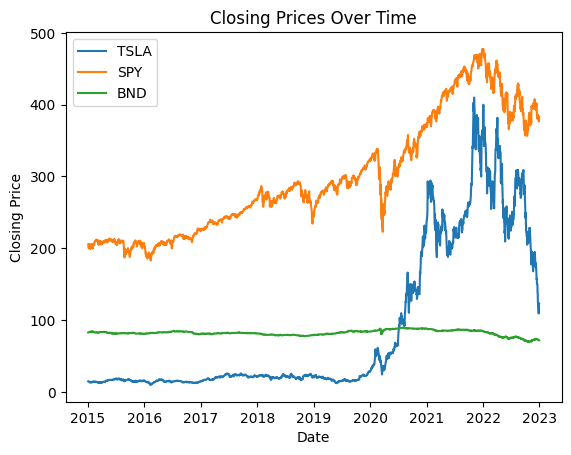

In [18]:
def plot_closing_prices(*dfs, labels):
    for df, label in zip(dfs, labels):
        plt.plot(df.index, df['Close'], label=label)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Closing Prices Over Time')
    plt.show()

plot_closing_prices(tsla_data, spy_data, bnd_data, labels=['TSLA', 'SPY', 'BND'])


### Train ARIMA/SARIMA Models

In [24]:

def train_arima(data, order, steps=30):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast


ARIMA Model Training for BND, SPY, and TSLA

In [26]:
# BND ARIMA Forecast
forecast_bnd_arima = train_arima(bnd_data['Close'], order=(0,1,0))
mae_bnd_arima, rmse_bnd_arima, mape_bnd_arima = evaluate_forecast(bnd_data['Close'][-30:], forecast_bnd_arima)

# SPY ARIMA Forecast
forecast_spy_arima = train_arima(spy_data['Close'], order=(3,1,1))
mae_spy_arima, rmse_spy_arima, mape_spy_arima = evaluate_forecast(spy_data['Close'][-30:], forecast_spy_arima)

# TSLA ARIMA Forecast
forecast_tsla_arima = train_arima(tsla_data['Close'], order=(0,1,1))
mae_tsla_arima, rmse_tsla_arima, mape_tsla_arima = evaluate_forecast(tsla_data['Close'][-30:], forecast_tsla_arima)


SARIMA Model Training for BND, SPY, and TSLA

In [27]:
def train_sarima(data, order, seasonal_order, steps=30):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast
